Question

1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [1]:
#importing the needed libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
#Reading the dataset
hr = pd.read_csv('HR_comma_sep.csv')
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


#### Data Cleaning

In [3]:
# checking the information in the dataset
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
#checking the null values
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [5]:
#checking some basic statistical details like percentile, mean, std etc. of a data frame and transposing.
hr.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [6]:
#viewing the unique value in department column
hr.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [7]:
#viewing the unique value in salary column
hr.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

1.Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)

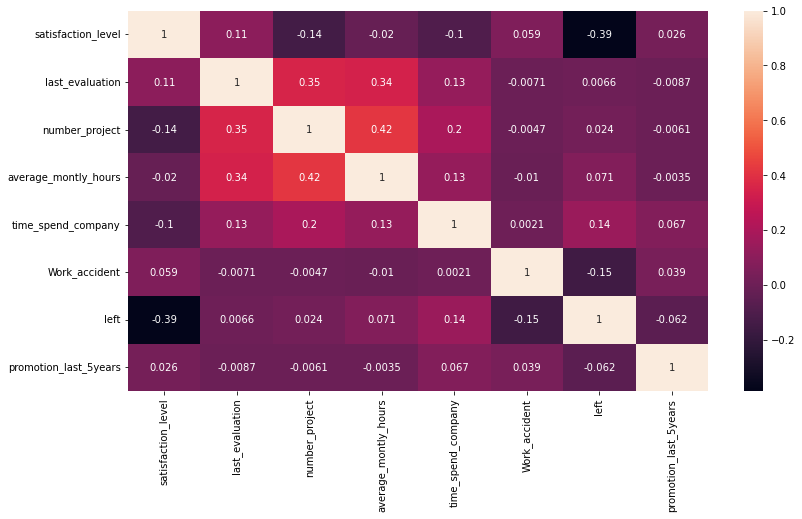

In [8]:
#checking the correlation of the columns
corr = hr.select_dtypes('number').corr()
corr
plt.figure(figsize = (13,7))
sns.heatmap(corr,annot = True);

2.Plot bar charts showing impact of employee salaries on retention

<AxesSubplot:xlabel='salary'>

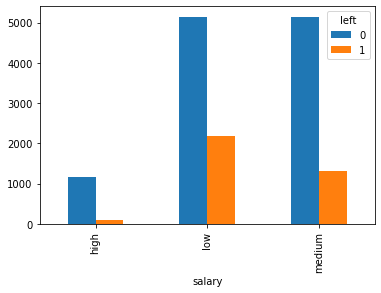

In [9]:
# ploting chart to show impact on employee salaries on retention
pd.crosstab(hr.salary,hr.left).plot(kind='bar')

Comment:The bar chart above revealed that employees with high salaries are not likely to leave the company. There is a correlation between employees retention and salaries

3. Plot bar charts showing corelation between department and employee retention

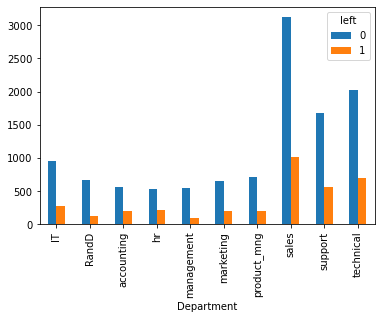

<Figure size 720x360 with 0 Axes>

In [10]:
#Ploting bar charts showing corelation between department and employee retention
pd.crosstab(hr.Department,hr.left).plot(kind='bar');
plt.figure(figsize=(10,5));

Comment: The bar chart above revealed that the sales department has the highest number of employees turnover and it also has the highest number of employees that didn't leave the organisation. However, management department has the lowest number of employees turnover and the least number of employees in the company. There is no correlation between the department and employees retention because all departments has people that left the company, so department does not determine employees retention.

4. Now build logistic regression model using variables that were narrowed down in step 1

In [11]:
hr.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium


In [12]:
#Converting string to a machine readable form
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()

hr['salary'] = Le.fit_transform(hr['salary'].values)

In [13]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [14]:
# importing sklearn model to slipt the dataset
from sklearn.model_selection import train_test_split

In [15]:
#Extracting the independent varibles
x = hr[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,1
1,0.80,262,0,2
2,0.11,272,0,2
3,0.72,223,0,1
4,0.37,159,0,1


In [16]:
#Extracting the dependent variable 
y = hr.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [17]:
#spliting my dataset into test and train data
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8)

In [18]:
x_test

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
9189,0.97,258,0,2
11112,0.85,235,0,1
11870,0.86,273,0,2
1347,0.10,292,0,2
14345,0.36,132,0,1
...,...,...,...,...
13503,0.29,187,0,0
13378,0.55,194,0,2
1354,0.10,273,0,2
8520,0.23,244,0,1


In [19]:
#importing sklearn model
from sklearn.linear_model import LogisticRegression
hr_model = LogisticRegression()

In [20]:
#fitting x_train,y_train into the model
hr_model.fit(x_train,y_train)

LogisticRegression()

In [21]:
hr_predict = hr_model.predict(x_test)
hr_predict

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [22]:
hr_model.predict_proba(x_test)

array([[0.92798424, 0.07201576],
       [0.89777459, 0.10222541],
       [0.89241043, 0.10758957],
       ...,
       [0.32580258, 0.67419742],
       [0.45912794, 0.54087206],
       [0.90830467, 0.09169533]])

5. Measure the accuracy of the model

In [23]:
#importing the necessary libraries to derive the accuracy score 
from sklearn.metrics import accuracy_score,confusion_matrix #,classification_report

In [24]:
#checking the accuracy of the model
hr_model.score(x_test,y_test)

0.7766666666666666

In [25]:
# using confussion matrix to test the accuracy of the model
com = confusion_matrix(y_test,hr_predict)
com

array([[2126,  150],
       [ 520,  204]], dtype=int64)

<AxesSubplot:>

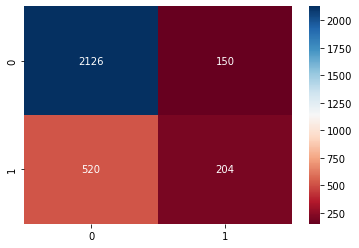

In [26]:
#visualizing the performance of the model 
sns.heatmap(com,annot = True,cmap = 'RdBu',fmt='d')